# Импорт библиотек

In [1]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = 8, 8  # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True  # Сетка графика
plt.pink()  # Цветовая схема при раскраске

<Figure size 800x800 with 0 Axes>

# Тестовые функции для оптимизации

In [2]:
@njit
def rastrigin(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result


@njit
def sphere(x: np.ndarray):  # функция Сферы
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2
    return result


@njit
def rozenbroke(x: np.ndarray):  # Функция Розенброка, минимум в точке f(1;1) = 0
    result = 0
    n = x.size
    for i in range(n - 1):
        result += (100 * x[i + 1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2
    return result

# Реализация метода роя частиц на Python с использованием numba

In [3]:
@njit
def main(v_max: float, dimension: int, f):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    # dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    # print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [6]:
list_of_all = main(1.154, 2, rastrigin)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 0.0035206117540411697 coordinates: [-0.00421269]


[-4.16835488  2.93695297  5.08542471 -2.03254537 -1.30434175 -3.75515276
  0.27228661 -2.79826329 -3.16386471  4.96567956  0.84483826  2.16575399
 -5.11664226  1.77615016 -2.76571974 -3.63256465  0.61436223 -1.95445748
 -3.18300001  3.35918861 -5.04324895  3.67635548 -1.72164011 -3.83253581
  3.4407914   3.15087982 -4.44368431  0.15225089  0.62778809 -2.2723832
  4.24828958  0.16452163 -2.49308399  1.73283308 -4.62890334 -0.56684315
  0.86752044  4.86862922 -1.58806549  0.52694535 -1.76042217  3.02437864
 -1.47647499 -4.69640428 -1.18944567 -1.69315183 -4.08878503  4.25216484
 -4.21305403 -1.26763677] 
 [ 7.06951542  9.4001052  27.26773858  3.54502486  1.00997142  4.1030911
 11.46987708  8.98848459  1.74599887 24.88958059  3.99562081  9.64091041
 10.05889757 11.51902908  7.53144749  1.02125818  9.70659855  4.2265331
  3.69455676 27.61902373  6.2153157  27.9794461  10.50048359  4.51583344
 31.15500021 14.0950035   4.0238148   4.260329    9.42175244  0.25062831
 27.9404979   4.91080486  

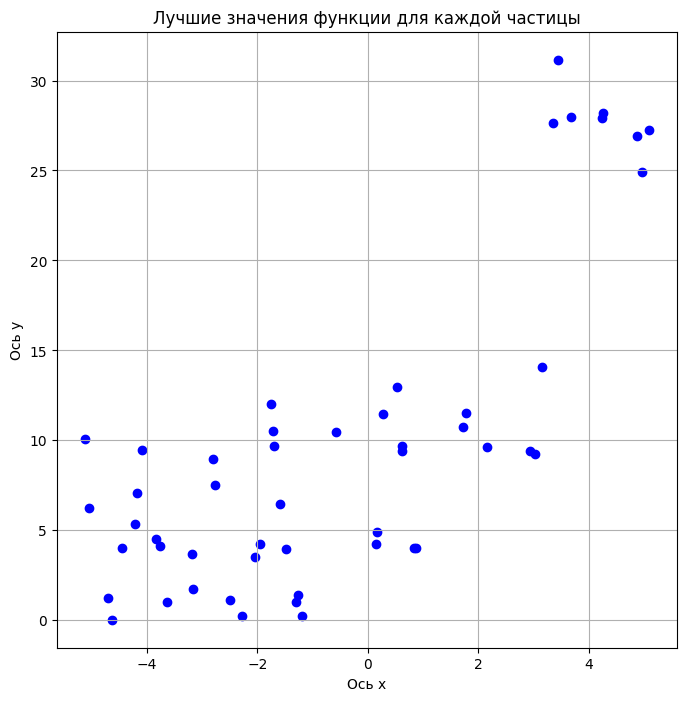

In [5]:
print(list_of_x, "\n", list_of_y)

plt.scatter(list_of_x, list_of_y, c='b', label='local min for each agent')
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

[-1.86035488 -1.86035488 -1.86035488 -0.87854537  1.00365825  1.00365825
  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825
  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825
  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825
  1.00365825  1.00365825  1.00365825  1.00365825  1.00365825  0.0356168
  0.0356168   0.0356168   0.0356168   0.0356168  -0.01290334 -0.01290334
 -0.01290334 -0.01290334 -0.01290334 -0.01290334 -0.01290334 -0.01290334
 -0.01290334 -0.01290334 -0.01290334 -0.01290334 -0.01290334 -0.01290334
 -0.01290334 -0.01290334] 
 [7.06951542 7.06951542 7.06951542 3.54502486 1.00997142 1.00997142
 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142
 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142
 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142
 1.00997142 1.00997142 1.00997142 1.00997142 1.00997142 0.25062831
 0.25062831 0.25062831 0.25062831 0.25062831 0.0330135

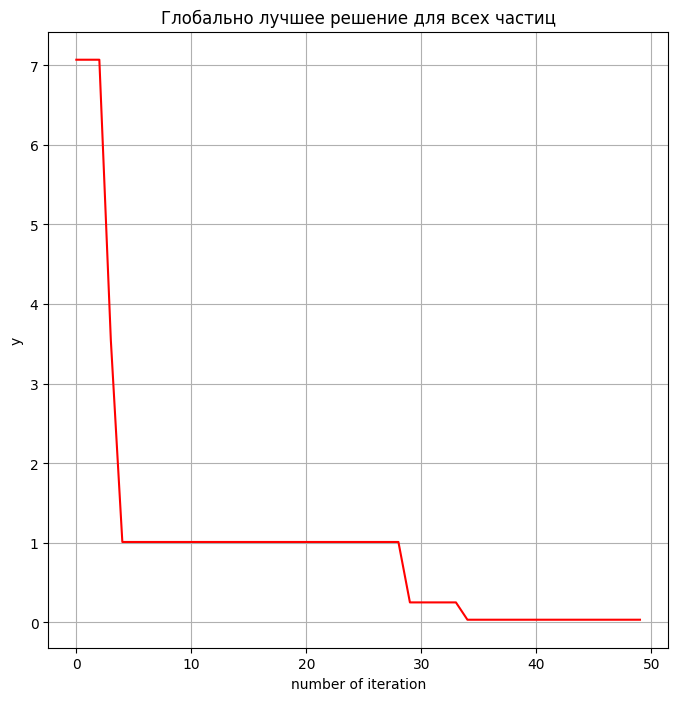

In [6]:
print(list_of_best_coord, "\n", list_of_best_solution)

plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution, c='r')
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()

# Тестирование функций для оптимизации

global_best: 0.012284949595459338 coordinates: [0.00786989]
global_best: 0.0004314798815183707 coordinates: [-0.00147475]
global_best: 0.02472215471638961 coordinates: [0.01116528]
global_best: 5.635251788760343e-06 coordinates: [-0.00016854]
global_best: 0.004564467757390389 coordinates: [0.00479677]
global_best: 1.0755287169577645 coordinates: [-0.97477445]
global_best: 0.002102048842880677 coordinates: [-0.00325512]
global_best: 0.03634149469662162 coordinates: [0.01353847]
global_best: 0.39058717661954745 coordinates: [-0.04451498]
global_best: 0.06382924768467468 coordinates: [0.01794637]


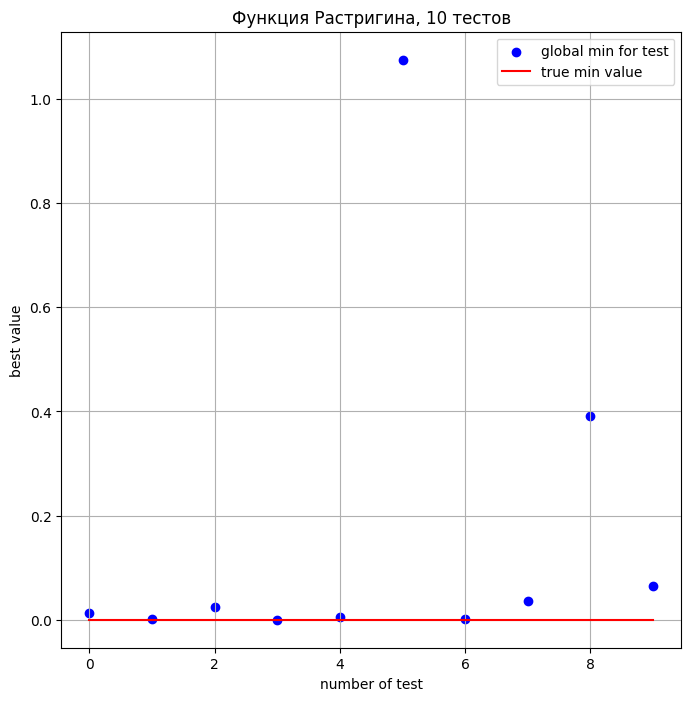

In [7]:
def draw(f, title: str):
    for i in range(10):
        list_of_best_x, list_of_best_y = main(1.154, 2, f)[1]

        y = list_of_best_y[len(list_of_best_y) - 1]

        if i == 0:
            plt.scatter(i, y, c='b', label='global min for test')
            plt.plot(np.arange(10), np.zeros(10), c='r', label='true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c='b')

    plt.title(title)
    plt.show()


draw(rastrigin, "Функция Растригина, 10 тестов")

global_best: 0.00037952238995749005 coordinates: [0.01948133]
global_best: 6.764312165835531e-07 coordinates: [0.00082245]
global_best: 1.2977704558152964e-05 coordinates: [0.00360246]
global_best: 3.6272055276504146e-06 coordinates: [-0.00190452]
global_best: 4.281684516517072e-05 coordinates: [-0.00654346]
global_best: 0.0009136785329695443 coordinates: [0.03022712]
global_best: 8.325222715916497e-05 coordinates: [-0.00912427]
global_best: 0.000160196947903341 coordinates: [-0.01265689]
global_best: 0.00028299789042221155 coordinates: [-0.01682254]
global_best: 0.00019505380317914832 coordinates: [0.01396617]


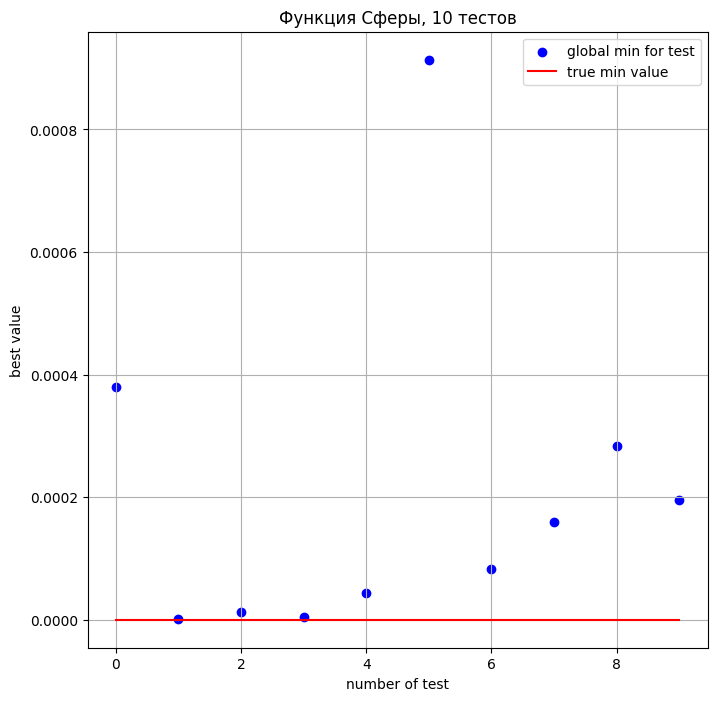

In [8]:
draw(sphere, "Функция Сферы, 10 тестов")

global_best: 0.0 coordinates: [-4.60451032]
global_best: 0.0 coordinates: [1.35311813]
global_best: 0.0 coordinates: [-2.95596459]
global_best: 0.0 coordinates: [4.33805185]
global_best: 0.0 coordinates: [3.84429486]
global_best: 0.0 coordinates: [-0.98590088]
global_best: 0.0 coordinates: [0.51976638]
global_best: 0.0 coordinates: [-5.09233764]
global_best: 0.0 coordinates: [-1.35168967]
global_best: 0.0 coordinates: [-5.03644059]


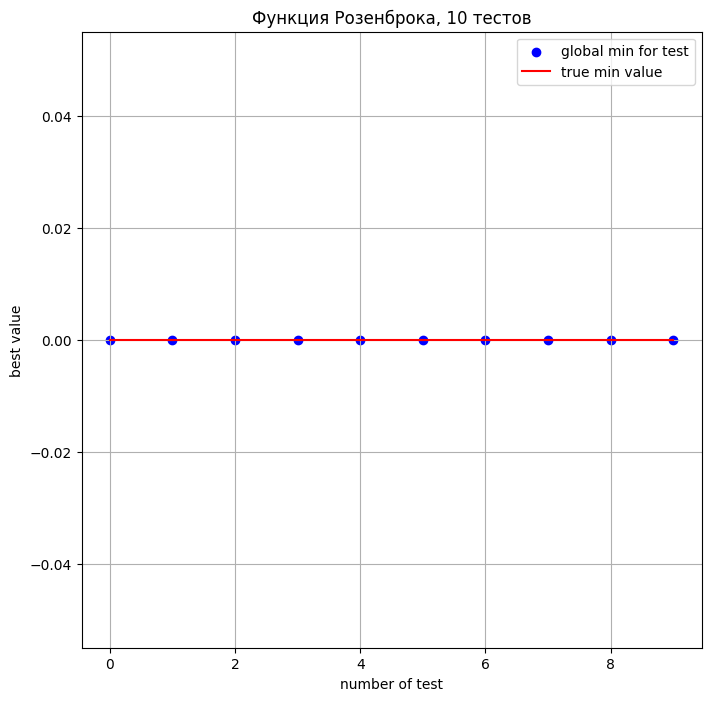

In [9]:
draw(rozenbroke, "Функция Розенброка, 10 тестов")

# Реализация метода роя частиц на C. Сравнение двух реализаций

In [4]:
import ctypes
import os


class Result(ctypes.Structure):
    _fields_ = [
        ("best_solution", ctypes.POINTER(ctypes.c_float)),
        ("best_y", ctypes.c_float),
        ("time_spent", ctypes.c_double)
    ]


def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


test_rastrigin = c("libcode.dll", "test_rastrigin", (ctypes.c_int, ctypes.c_float), Result)
test_sphere = c("libcode.dll", "test_sphere", (ctypes.c_int, ctypes.c_float), Result)
test_rozenbroke = c("libcode.dll", "test_rozenbroke", (ctypes.c_int, ctypes.c_float), Result)

In [5]:
dimension = 2
v_max = 1.134

result = test_rastrigin(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

result = test_sphere(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

result = test_rozenbroke(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

best: 0.0019989013671875
Time is 0.022
Coordinates: [0.003175973892211914]
best: 1.2993245945835952e-06
Time is 0.015
Coordinates: [-0.0011398792266845703]
best: 0.0
Time is 0.031
Coordinates: [-3.2827563285827637]


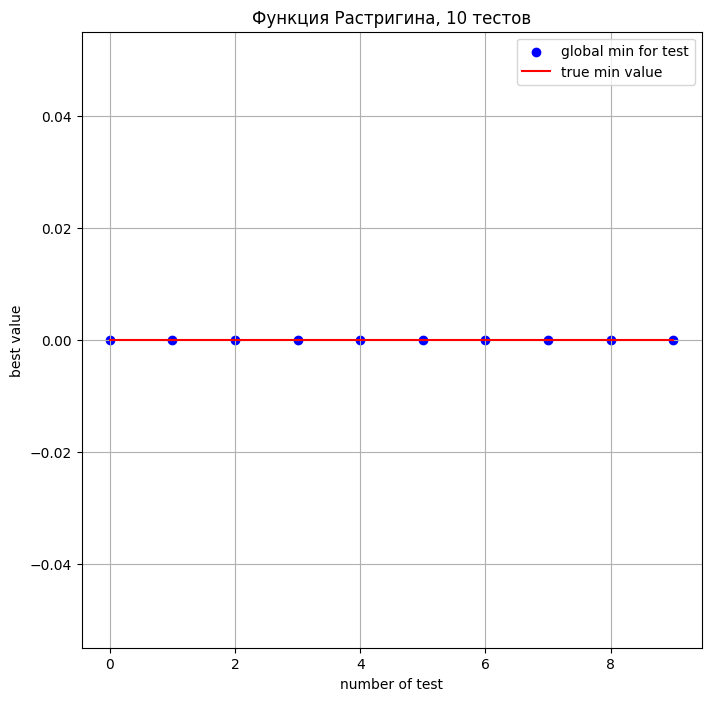

In [7]:
def draw_c(f, title: str):
    dimension = 2
    v_max = 1.134

    for i in range(10):
        y = f(dimension, v_max).best_y

        if i == 0:
            plt.scatter(i, y, c='b', label='global min for test')
            plt.plot(np.arange(10), np.zeros(10), c='r', label='true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c='b')

    plt.title(title)
    plt.show()


draw_c(test_rastrigin, "Функция Растригина, 10 тестов")

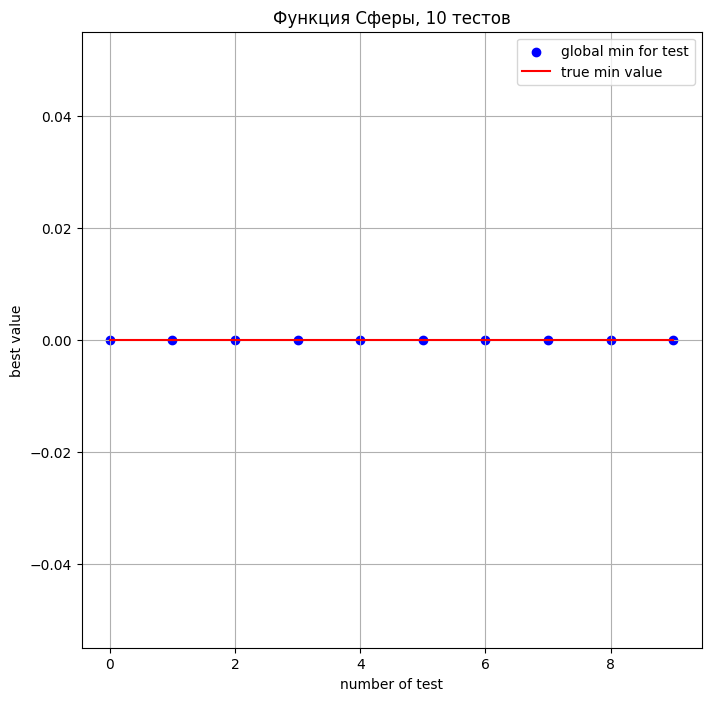

In [8]:
draw_c(test_sphere, "Функция Сферы, 10 тестов")

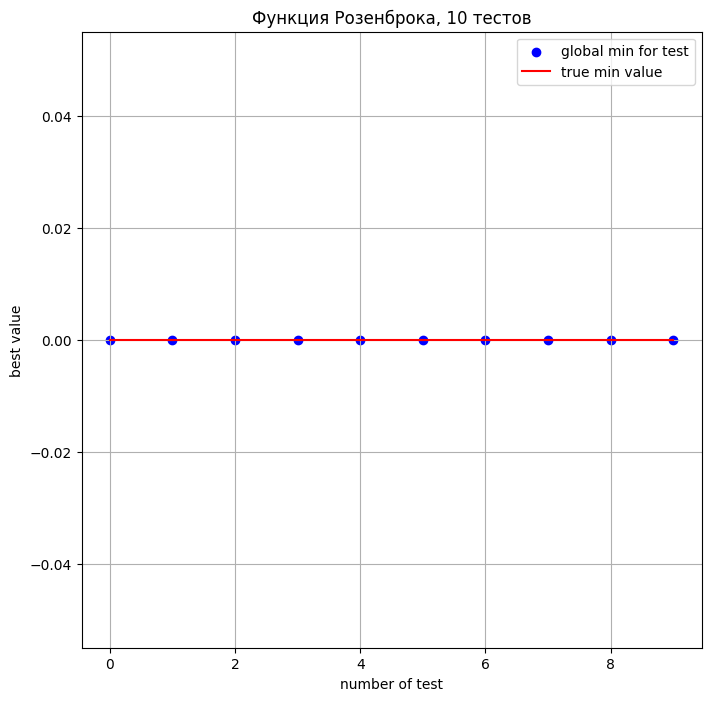

In [6]:
draw_c(test_rozenbroke, "Функция Розенброка, 10 тестов")

<h3>Сравнение реализаций по скорости выполнения</h3>

In [8]:
@njit
def running_on_time(v_max: float, dimension: int, f):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

    return p_best_coordinates, p_global_best

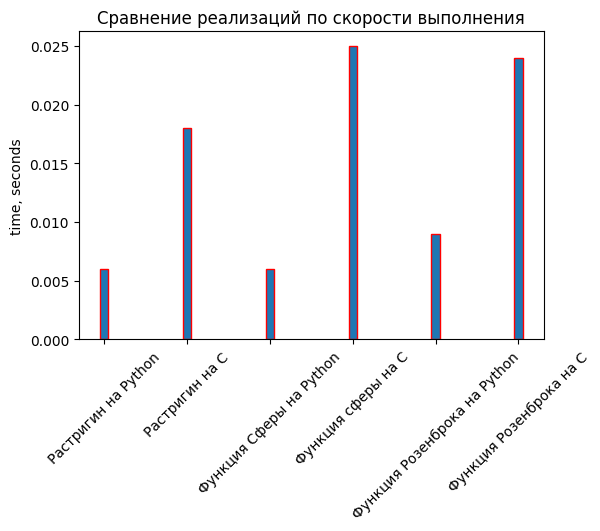

In [10]:
def time_remember(f):
    start = time.time()
    running_on_time(v_max, dimension, f)
    end = time.time() - start
    return end


dimension = 2
v_max = 1.134

time_rastrigin_on_c = test_rozenbroke(dimension, v_max).time_spent
time_sphere_on_c = test_sphere(dimension, v_max).time_spent
time_rozenbroke_on_c = test_rozenbroke(dimension, v_max).time_spent

time_rastrigin_on_python = time_remember(rastrigin)
time_sphere_on_python = time_remember(sphere)
time_rozenbroke_on_python = time_remember(rozenbroke)

plt.rcParams['axes.grid'] = False
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

list_to_draw = [time_rastrigin_on_python, time_rastrigin_on_c,
                time_sphere_on_python, time_sphere_on_c,
                time_rozenbroke_on_python, time_rozenbroke_on_c]
list_of_title = ['Растригин на Python', 'Растригин на C',
                 'Функция Сферы на Python', 'Функция сферы на C',
                 'Функция Розенброка на Python', 'Функция Розенброка на С']

ax.bar(list_of_title, list_to_draw, width=0.1, edgecolor='r')

plt.ylabel("time, seconds")
plt.title("Сравнение реализаций по скорости выполнения")
plt.xticks(rotation=45)
plt.show()


# Тестирование алгоритма в n-мерном пространстве

In [5]:
# Тестирование реализации на C
def test_dimension_c(f, v_max: float, title: str):
    coord = []
    for dimension in range(2, 100 + 1):
        y = f(dimension, v_max).best_y
        coord.append(y)

    plt.plot(np.arange(2, 100 + 1), coord, c='r', label='global min for test')
    plt.xlabel("Размерность пространства")
    plt.ylabel("Лучшее значение")
    plt.legend()
    plt.title(title)
    plt.show()

# генерация по умолчанию: 50 агентов и 400 поколений (итераций)
dimension = 100 # 100-мерное пространство, 99 аргументов
v_max = 0.05 # максимально заданная скорость

result_rastrigin = test_rastrigin(dimension, v_max) # вызываем функцию для тестирования функции, передаём в неё скорость и размерность
print("Theoretical value (rastrigin): f(0, 0..., 0) = 0\n")
print("best:", result_rastrigin.best_y)
print("Time is", result_rastrigin.time_spent)

best_solution = [result_rastrigin.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

print("Theoretical value (sphere): f(0, 0..., 0) = 0\n")
result_sphere = test_sphere(dimension, v_max)
print("best:", result_sphere.best_y)
print("Time is", result_sphere.time_spent)

best_solution = [result_sphere.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

Theoretical value (rastrigin): f(0, 0..., 0) = 0

best: 812.3895874023438
Time is 0.438
Coordinates: [0.01262596994638443, 0.02365797385573387, 0.8317161202430725, -4.052603721618652, -0.6401539444923401, -1.1663869619369507, -0.17036747932434082, 1.53779137134552, -1.8561205863952637, 0.4192882180213928, -1.1235120296478271, -1.0506845712661743, -2.266441822052002, 0.39108777046203613, 2.8074934482574463, 0.10480277240276337, -2.7872660160064697, -1.065435528755188, 1.7329481840133667, -0.832926869392395, 2.1309781074523926, 1.1263325214385986, 1.781501054763794, -0.4020310640335083, 0.017339594662189484, 0.9208471179008484, -1.0530574321746826, -0.3539201021194458, 0.0614585243165493, -0.7027328014373779, 0.02364267036318779, -1.77328622341156, 2.582939624786377, 0.1960972398519516, -0.13773678243160248, 1.8021305799484253, 0.5261707305908203, 0.1397387981414795, 0.6810126900672913, -1.1305278539657593, -0.8649728298187256, -3.126399517059326, 0.21420727670192719, -0.9036507606506348

In [13]:
def output_python(v_max, dimension, f):
    start = time.time()
    best_x, best_y = running_on_time(v_max, dimension, f)
    end = time.time() - start
    print("Time is", end)
    print("Best y:", best_y, "\nBest x:", best_x)

In [15]:
v_max = 0.05    # максимально заданная скорость
dimension = 60  # 60-мерное пространство, 59 аргументов
# генерация по умолчанию: 50 агентов и 400 поколений (итераций)
print("Theoretical value (rastrigin): f(0, 0..., 0) = 0\n")
output_python(v_max, dimension, rastrigin)
print("\nTheoretical value (sphere): f(0, 0..., 0) = 0\n")
output_python(v_max, dimension, sphere)

Theoretical value (rastrigin): f(0, 0..., 0) = 0

Time is 0.03899550437927246
Best y: 894.0995674072892 
Best x: [ 0.42012286  2.44875739  3.71371419 -4.11649726  2.16598231  0.73720543
  2.21226376  1.03146692 -3.24576271 -2.76095391  1.60359438  1.82951965
 -4.06322696  4.06299852 -3.88440534 -2.93252396 -2.60944864 -2.86660312
  3.27163712  4.21184198  1.97289104  2.46159767 -2.79436145 -5.05224558
 -0.3695951   4.93102123  2.84308905 -1.95024922  0.08860193 -3.77526683
  0.97048515 -2.26514049  0.27518353  2.56886425  2.79170121 -1.8503385
 -0.76380817 -1.6954989  -2.01977529  4.05063488  0.78291591  2.04683721
 -0.83250878 -2.24277672 -1.62600816 -1.59280565 -3.08301635 -1.75789475
  0.29065485 -4.32019466  2.39284654 -3.97753156 -2.11393167 -3.55773071
 -0.20929719  1.75540227 -1.49262453 -0.08384466  1.73114255]

Theoretical value (sphere): f(0, 0..., 0) = 0

Time is 0.015000343322753906
Best y: 425.8603962879073 
Best x: [ 0.68402817  3.47432998 -4.54540806 -0.63051153 -0.95586